In [1]:
import sys
sys.path.insert(0, '../..')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
from matplotlib.lines import Line2D

from tests.test3 import Test
from visualizer.main import Visualizer

np.random.seed(42)

# Triangulacja wielokątów monotonicznych - problem monitorowania galerii


## Przydatne funkcje


In [2]:
polygon_example_1 = [(5,5), (3,4), (6,3), (4,2), (6,0), (7,1), (8,4)]
polygon_example_2 = [(2,0), (5,1), (6,0), (8,3), (7,2), (8,7), (6,9), (5,8), (2,9), (1,7), (2,4), (4,5), (3,6), (5, 7), (5.5, 3), (2,2), (1,3), (0,1)]
polygon_example_colors = [1, 3, 1, 0, 2, 4, 0, 2, 0, 4, 1, 4, 4, 3, 4, 2, 0, 4]
polygon_example_tri = [(polygon_example_1[0], polygon_example_1[2]),
                      (polygon_example_1[2], polygon_example_1[5]),
                      (polygon_example_1[2], polygon_example_1[6]),
                      (polygon_example_1[2], polygon_example_1[4])]

In [3]:
def draw_polygon(polygon):
    vis = Visualizer()
    vis.add_polygon(polygon, fill=False)
    vis.axis_equal()
    vis.show()

In [4]:
def draw_polygon_colors(polygon,colors):
    points_start=[]
    points_end=[]
    points_connect=[]
    points_divide=[]
    points_regular=[]
    for i in range(len(polygon)):
        if colors[i]==0:
            points_start.append(polygon[i])
        elif colors[i]==1:
            points_end.append(polygon[i])
        elif colors[i]==2:
            points_connect.append(polygon[i])
        elif colors[i]==3:
            points_divide.append(polygon[i])
        elif colors[i]==4:
            points_regular.append(polygon[i])

    vis = Visualizer()
    colors_start = ['green']
    color_end=['red']
    color_connect=['blue']
    color_divide=['cyan']
    color_regular=['#3B240B']
    vis.add_polygon(polygon, fill=False)
    vis.add_point(points_start, color=colors_start)
    vis.add_point(points_end, color=color_end)
    vis.add_point(points_connect, color=color_connect)
    vis.add_point(points_divide, color=color_divide)
    vis.add_point(points_regular, color=color_regular)
    vis.axis_equal()
    vis.show()

In [5]:
def draw_polygon_tri(polygon,tri):
    vis = Visualizer()
    points = polygon
    tri_line_segments = tri
    vis.add_polygon(points, fill=False)
    vis.add_point(points)
    vis.add_line_segment(tri_line_segments, color='red')
    vis.axis_equal()
    vis.show()

## Wprowadzenie
Celem ćwiczenia jest:
- sprawdzanie $y$-monotoniczności
- podział wierchołków na kategorie
- triangulacja wielokąta monotonicznego

### Przykładowy wielokąt $y$-monotoniczny

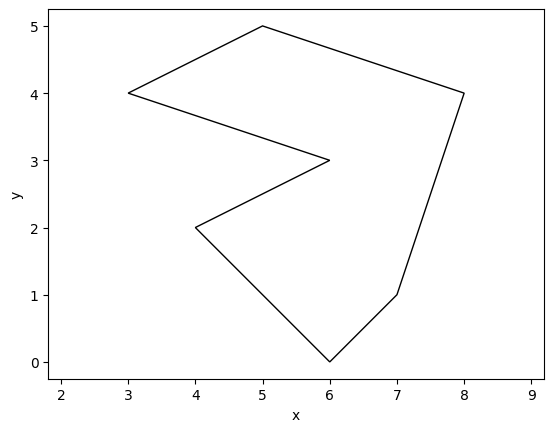

In [6]:
draw_polygon(polygon_example_1)

Do tego celu wygeneruj wielokąt.

In [7]:
def select_polygon():
    root = tk.Tk()
    root.title("PolygonSelector")
    root.geometry("500x500")

    fig = Figure(figsize=(5, 3), dpi=100)
    ax = fig.add_subplot(111)
    ax.grid()
    ax.scatter([0,0,100,100], [100,0,100,0], s=15, color="red")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")

    polygon = []

    def save_polygon():
            file_name = file_name_entry.get()
            
            if file_name != "" and file_name != "ERROR" and len(polygon) > 2:
                first = polygon[0]
                last = polygon[-1]
                line = Line2D([last[0], first[0]], [last[1], first[1]], color="black", linewidth=1)
                ax.add_line(line)
                canvas.draw()

                with open(file_name, "w") as f:
                    for point in polygon:
                        f.write(f"{point[0]} {point[1]}\n")
            else:
                file_name_entry.delete(0, tk.END) 
                file_name_entry.insert(0, "ERROR")

    def reset_polygon():
        polygon.clear()
        ax.cla()
        ax.grid()
        ax.scatter([0,0,100,100], [100,0,100,0], s=15, color="red")
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        canvas.draw()    
        canvas.draw()

        file_name = file_name_entry.get()
        if file_name != "":
            with open(file_name, "w") as f:
                pass

        file_name_entry.delete(0, tk.END)

    def exit():
        root.destroy()

    def on_click(event):
        if event.xdata is None or event.ydata is None:
            return 

        point = (event.xdata, event.ydata)

        if len(polygon) > 0:
            prev = polygon[-1]
            line = Line2D([prev[0], point[0]], [prev[1], point[1]], color="black", linewidth=1)
            ax.add_line(line)

        polygon.append(point)
        ax.scatter(point[0], point[1], s=15, color='black')
        canvas.draw()

    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas.draw()
    canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

    canvas.mpl_connect("button_press_event", on_click)

    button_frame = tk.Frame(root)
    button_frame.pack(pady=10)
    file_name_entry = tk.Entry(button_frame, width=20)
    save_button = tk.Button(button_frame, text="save", command=save_polygon)
    reset_button = tk.Button(button_frame, text="reset", command=reset_polygon)
    exit_button = tk.Button(button_frame, text="exit", command=exit)
    reset_button.pack(side="left", pady=5, padx=5)
    file_name_entry.pack(side="left", pady=5, padx=5)
    save_button.pack(side="left", pady=5, padx=5)
    exit_button.pack(side="left", pady=5, padx=5)
    root.mainloop()

    return polygon

In [8]:
select_polygon()

[]

In [9]:
def read_polygon(file_name=None):
    polygon = []

    if not file_name:
        print("Incorrect file name")
        return
    with open(file_name, "r") as f:
        lines = f.readlines()
        polygon = [tuple(map(float, line.rstrip("\n").split(" "))) for line in lines]
    
    return polygon

In [10]:
polygon_file_names = ["A", "B", "C", "D", "E", "F"]

A: 8 wierzchołków
B: 8 wierzchołków
C: 12 wierzchołków
D: 9 wierzchołków
E: 10 wierzchołków
F: 10 wierzchołków


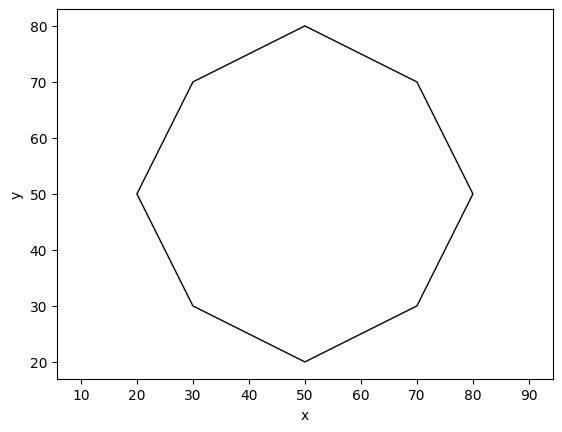

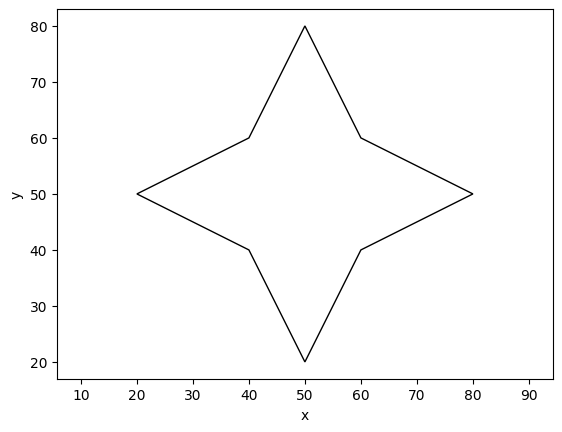

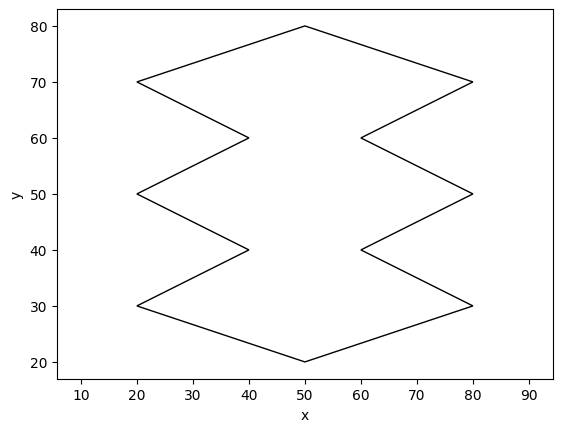

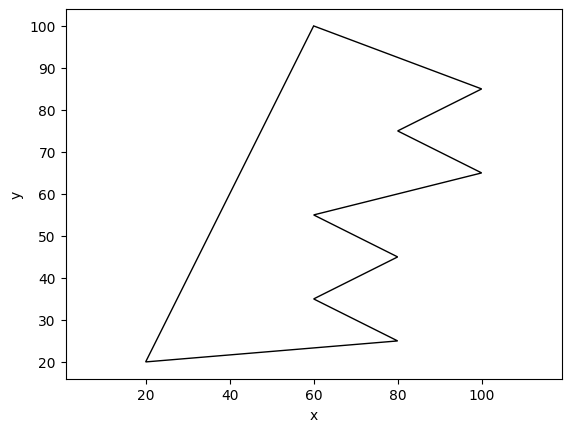

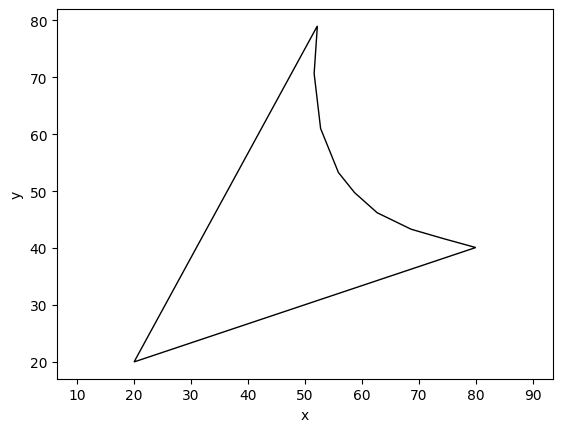

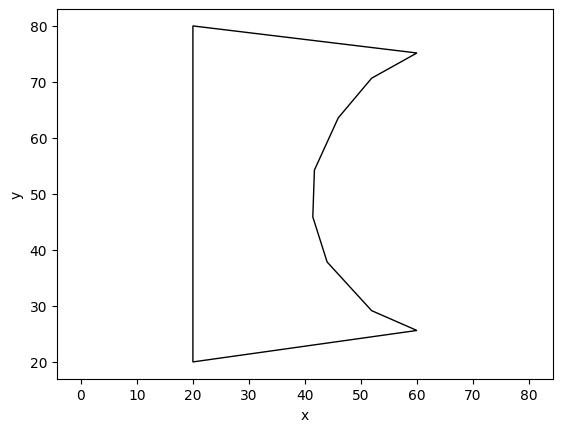

In [11]:
for polygon_file_name in polygon_file_names:
    polygon = read_polygon(polygon_file_name)
    draw_polygon(polygon)
    print(f"{polygon_file_name}: {len(polygon)} wierzchołków")

## Czy wielokąt jest $y$-monotoniczny?

Wielokąt jest monotoniczny, gdy jego wierzchołki mogą być ułożone w taki sposób, że jedna z jego współrzędnych (na przykład współrzędna $x$ lub $y$, w zależności od układu współrzędnych) zawsze rośnie lub maleje wzdłuż kolejnych wierzchołków. Innymi słowy, dla każdej pary wierzchołków wielokąta (oprócz wierzchołka startowego i końcowego), jeden z punktów ma większą (lub mniejszą) wartość danej współrzędnej niż drugi punkt.

W praktyce, wielokąt monotoniczny może być łatwiej sortowany lub przetwarzany w pewnych algorytmach geometrycznych, ponieważ istnieje pewna kolejność, w jakiej wierzchołki pojawiają się wzdłuż danej osi (np. osi $x$ lub $y$). Monotoniczność może ułatwić znajdowanie przecięć linii w takim wielokącie lub wykonywanie innych operacji geometrycznych. W tym zadaniu interesuje nas monotoniczność wielokąta wzdłuż osi $y$.

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```is_y_monotonic```. Pamiętaj, aby sprawozdanie zawierało krótki opis działania tej funkcji.

In [12]:
def get_min_max_y_index(points):
    n = len(points)
    min_index = 0
    min_value = points[0][1]
    max_index = 0
    max_value = points[0][1]
    
    for i in range(1, n):
        if points[i][1] < min_value:
            min_index = i
            min_value = points[i][1]
        elif points[i][1] > max_value:
            max_index = i
            max_value = points[i][1]

    return min_index, max_index

In [13]:
def is_y_monotonic(polygon):
    """
    Funkcja określa czy podana figura jest y-monotoniczna.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: wartość bool - true, jeśli wielokąt jest monotoniczny i false jeśli nie jest
    """
    n = len(polygon)
    min_index, max_index = get_min_max_y_index(polygon)

    current = max_index
    while current != min_index:
        next = (current + 1) % n
        if polygon[next][1] >= polygon[current][1]: return False
        current = next

    while current != max_index:
        next = (current + 1) % n
        if polygon[next][1] <= polygon[current][1]: return False
        current = next

    return True

Przeprowadź test poprawności powyższej funkcji.

In [14]:
Test().runtest(1, is_y_monotonic)

Lab 3, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.000s


Sprawdź monotoniczność swojego wielokątu.

In [15]:
flag = True
for polygon_file_name in polygon_file_names:
    polygon = read_polygon(polygon_file_name)
    if not is_y_monotonic(polygon):
        print(f"Wielokąt {polygon_file_name} nie jest ściśle y-monotoniczny")
        flag = False
    else:
        print(f"Wielokąt {polygon_file_name} jest ściśle y-monotoniczny")
if flag:
    print("Wszystkie zadane wielokąty są ściśle y-monotoniczne")

Wielokąt A jest ściśle y-monotoniczny
Wielokąt B jest ściśle y-monotoniczny
Wielokąt C jest ściśle y-monotoniczny
Wielokąt D jest ściśle y-monotoniczny
Wielokąt E jest ściśle y-monotoniczny
Wielokąt F jest ściśle y-monotoniczny
Wszystkie zadane wielokąty są ściśle y-monotoniczne


***

# Podział wierzchołków na kategorie

Wierzchołki naszego wielokąta możemy podzielić na parę kategorii:
- początkowe, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których zaczyna się monotoniczny spadek
- końcowe, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których monotoniczność wielokąta się zmienia, czyli na przykład zaczyna się monotoniczny wzrost, jeśli wcześniej był spadek, lub na odwrót.

Wierzchołki startowe i końcowe są ważne w kontekście algorytmów przetwarzania wielokątów monotonicznych, takich jak algorytmy dziel i zwyciężaj oraz triangulacji.
- dzielący, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które wyznaczają przekątne (linie łączące), tworzące trójkąty podczas triangulacji.
- łączący, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które są połączone liniami (przekątnymi) wewnątrz wielokąta, tworząc trójkąty.

Wierzchołki łączące i dzielące odgrywają kluczową rolę w procesie triangulacji wielokątów, pozwalając na podział figury na trójkąty w sposób bezkolizyjny.
- prawidłowy, pozostałe przypadki, jeden sąsiad powyżej, drugi poniżej


Wierzchołki naszego wielokąta możemy podzielić na parę kategorii:
- początkowe, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których zaczyna się monotoniczny spadek
- końcowe, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których monotoniczność wielokąta się zmienia, czyli na przykład zaczyna się monotoniczny wzrost, jeśli wcześniej był spadek, lub na odwrót.

Wierzchołki startowe i końcowe są ważne w kontekście algorytmów przetwarzania wielokątów monotonicznych, takich jak algorytmy dziel i zwyciężaj oraz triangulacji.
- dzielący, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które wyznaczają przekątne (linie łączące), tworzące trójkąty podczas triangulacji.
- łączący, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które są połączone liniami (przekątnymi) wewnątrz wielokąta, tworząc trójkąty.

Wierzchołki łączące i dzielące odgrywają kluczową rolę w procesie triangulacji wielokątów, pozwalając na podział figury na trójkąty w sposób bezkolizyjny.
- prawidłowy, pozostałe przypadki, jeden sąsiad powyżej, drugi poniżej


### Przykładowy wielokąt z pokolorowanymi wierzchołkami.

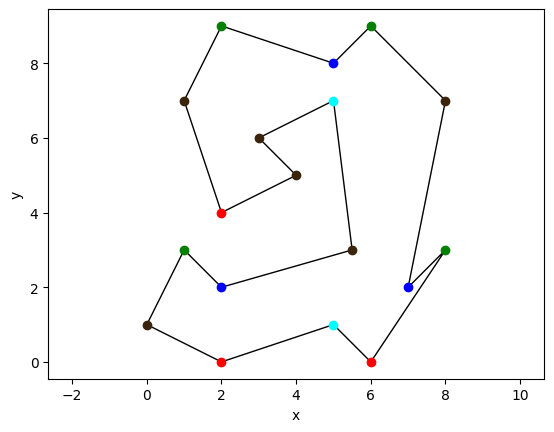

In [16]:
draw_polygon_colors(polygon_example_2,polygon_example_colors)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```color_vertex``` .

In [17]:
def mat_det(a, b, c):
    return (b[0] - a[0]) * (c[1] - b[1]) - (b[1] - a[1]) * (c[0] - b[0])


In [18]:
def color_vertex(polygon, epsilon=1e-24):
    """
    Funkcja dzieli wierzchołki na kategorie i przypisuje wierzchołkom odpowiednie numery: 0 - początkowy, 1 - końcowy, 2 - łączący, 3 - dzielący, 4 - prawdiłowy
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica o długości n, gdzie n = len(polygon), zawierająca cyfry z przedziału 0 - 4, gdzie T[i] odpowiada kategorii i-tego wierzchołka.
    """
    n = len(polygon)
    colors = [None for _ in range(n)]

    for i in range(0, n):
        previous = polygon[i-1]
        current = polygon[i]
        next = polygon[(i + 1) % n]

        if previous[1] < current[1] and next[1] < current[1]:
            mat_det_value = mat_det(previous, current, next)
            if mat_det_value > epsilon:
                colors[i] = 0
            elif mat_det_value < -epsilon:
                colors[i] = 3
        elif current[1] < previous[1] and current[1] < next[1]:
            mat_det_value = mat_det(previous, current, next)
            if mat_det_value > epsilon:
                colors[i] = 1
            elif mat_det_value < -epsilon:
                colors[i] = 2
        else:
            colors[i] = 4

    return colors

Przeprowadź test poprawności powyższej funkcji. 

In [19]:
Test().runtest(2, color_vertex)

Lab 3, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.000s


Zwizualizuj swój wielokąt z pokolorowanymi według kategorii wierzchołkami.

A
liczba wierzchołków początkowych: 1
liczba wierzchołków końcowych: 1
liczba wierzchołków dzielących: 0
liczba wierzchołków łączących: 0
liczba wierzchołków prawidłowych: 6

B
liczba wierzchołków początkowych: 1
liczba wierzchołków końcowych: 1
liczba wierzchołków dzielących: 0
liczba wierzchołków łączących: 0
liczba wierzchołków prawidłowych: 6

C
liczba wierzchołków początkowych: 1
liczba wierzchołków końcowych: 1
liczba wierzchołków dzielących: 0
liczba wierzchołków łączących: 0
liczba wierzchołków prawidłowych: 10

D
liczba wierzchołków początkowych: 1
liczba wierzchołków końcowych: 1
liczba wierzchołków dzielących: 0
liczba wierzchołków łączących: 0
liczba wierzchołków prawidłowych: 7

E
liczba wierzchołków początkowych: 1
liczba wierzchołków końcowych: 1
liczba wierzchołków dzielących: 0
liczba wierzchołków łączących: 0
liczba wierzchołków prawidłowych: 8

F
liczba wierzchołków początkowych: 1
liczba wierzchołków końcowych: 1
liczba wierzchołków dzielących: 0
liczba wierzchołków

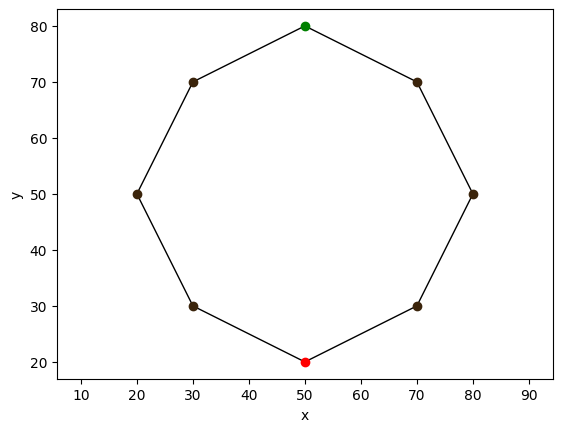

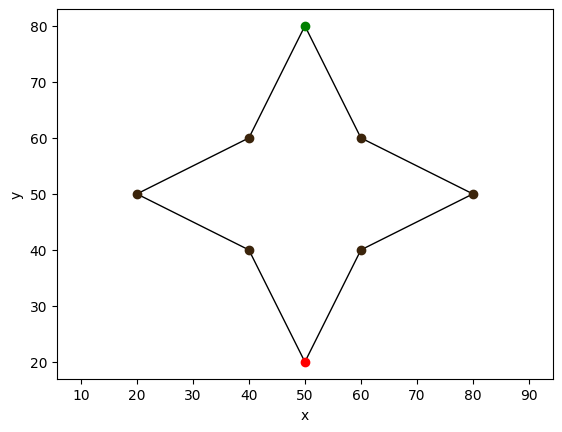

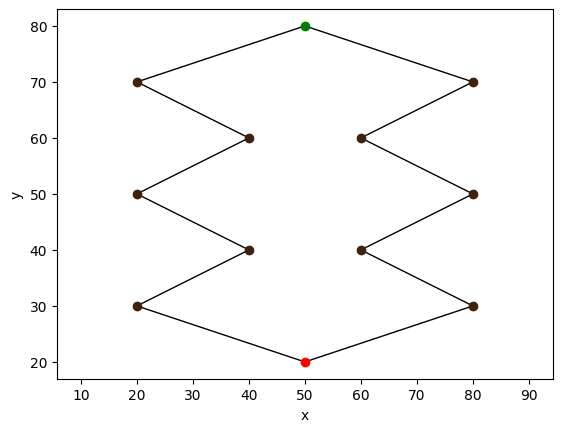

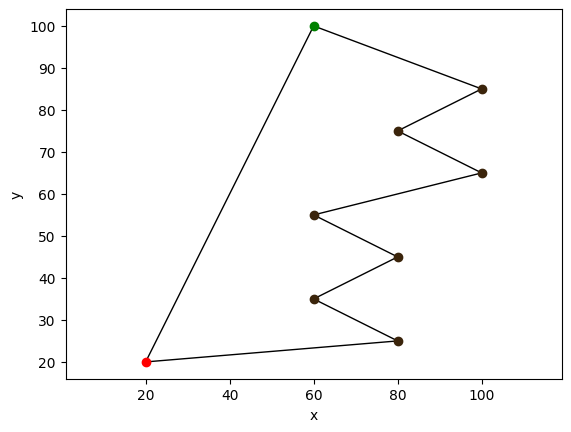

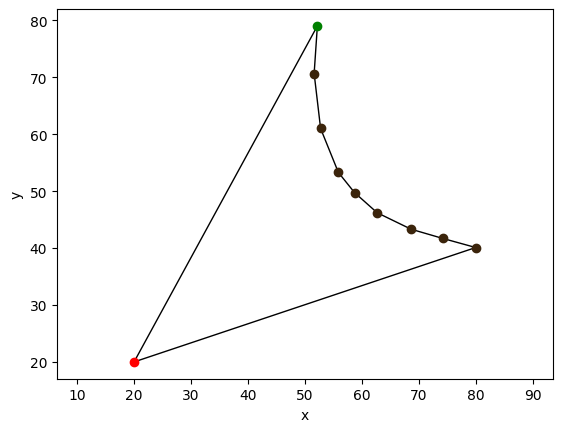

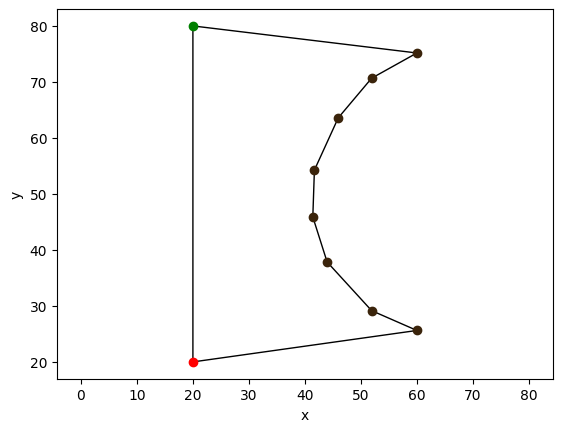

In [20]:
for polygon_file_name in polygon_file_names:
    polygon = read_polygon(polygon_file_name)
    colors = color_vertex(polygon)
    draw_polygon_colors(polygon, colors)
    start, end, divide, connect, regular = 0, 0, 0, 0, 0
    for i in range(len(polygon)):
        if colors[i]==0: start += 1
        elif colors[i]==1: end += 1
        elif colors[i]==2: connect += 1
        elif colors[i]==3: divide += 1
        elif colors[i]==4: regular += 1
    print(f"{polygon_file_name}")
    print(f"liczba wierzchołków początkowych: {start}")
    print(f"liczba wierzchołków końcowych: {end}")
    print(f"liczba wierzchołków dzielących: {divide}")
    print(f"liczba wierzchołków łączących: {connect}")
    print(f"liczba wierzchołków prawidłowych: {regular}")
    print()

***

# Triangulacja wielokąta monotonicznego

Triangulacja wielokąta monotonicznego to proces podziału wielokąta monotonicznego na trójkąty poprzez dodawanie przekątnych (linii łączących wierzchołki), które nie przecinają się wewnętrznie.

### Przykładowy wielokąt podzielony na trójkąty.

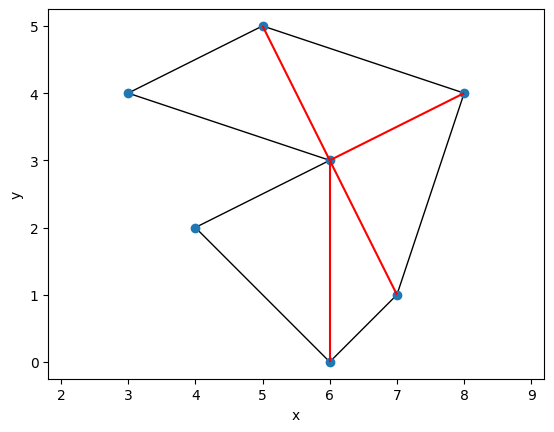

In [21]:
draw_polygon_tri(polygon_example_1, polygon_example_tri)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```triangulation```. Wykorzystaj algorytm opisany na wykładzie.

Jakich struktur można użyć do przechowywania wielokątu, oraz utworzonej triangulacji? Uzasadnij wybór struktury w swoim algorytmie

In [22]:
def split_polygon_into_chains(polygon):
    n = len(polygon)
    min_index, max_index = get_min_max_y_index(polygon)
    
    left_chain, right_chain = [], []

    current = max_index
    while True:
        if current == min_index:
            break
        left_chain.append(current)
        current = (current + 1) % n
        
    current = (max_index - 1 + n) % n
    while True:
        right_chain.append(current)
        if current == min_index:
            break
        current = (current - 1 + n) % n
        
    return left_chain, right_chain

In [23]:
def merge_chains(left_chain, right_chain, polygon):
    merged_points = []
    right_length = len(right_chain)
    left_length = len(left_chain)
    left_index, right_index = 0, 0

    merged_points.append((left_chain[0], "left"))
    while left_index < left_length and right_index < right_length:
        if polygon[left_chain[left_index]][1] > polygon[right_chain[right_index]][1]:
            merged_points.append((left_chain[left_index], "left"))
            left_index += 1
        else:
            merged_points.append((right_chain[right_index], "right"))
            right_index += 1

    while left_index < left_length:
        merged_points.append((left_chain[left_index], "left"))
        left_index += 1
    while right_index < right_length:
        merged_points.append((right_chain[right_index], "right"))
        right_index += 1

    return merged_points

In [24]:
def triangulation(polygon, epsilon=1e-24):
    n = len(polygon)
    left_chain, right_chain = split_polygon_into_chains(polygon)
    merged = merge_chains(left_chain, right_chain, polygon)

    edges = [(i, i+1) for i in range(n)]
    diagonals = []
    stack = [merged[0], merged[1]]

    for i in range(2, len(merged)):
        if merged[i][1] == stack[-1][1]:
            while len(stack) > 1:
                mat_det_value = mat_det(polygon[stack[-1][0]], polygon[stack[-2][0]], polygon[merged[i][0]])
                difference = abs(merged[i][0] - stack[-2][0]) 
                if (difference != 1 and difference != n-1 and
                    ((merged[i][1] == "left" and mat_det_value < -epsilon) or (merged[i][1] == "right" and mat_det_value > epsilon))):
                    diagonals.append((merged[i][0], stack[-2][0]))
                    stack.pop()
                else:
                    break
            stack.append(merged[i])
        else:
            for j in range(len(stack)):
                difference = abs(merged[i][0] - stack[j][0])
                if difference != 1 and difference != n - 1:
                    diagonals.append((merged[i][0], stack[j][0]))
            stack = [stack[-1], merged[i]]

    return diagonals

ODPOWIEDŹ: 

Przeprowadź testy poprawności powyższej funkcji.


In [25]:
Test().runtest(3, triangulation)

Lab 3, task 3:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.000s


Zwizualizuj powstały wielokąt podzielony na trójkąty.

A
liczba dodanych przekątnych: 5
B
liczba dodanych przekątnych: 5
C
liczba dodanych przekątnych: 9
D
liczba dodanych przekątnych: 6
E
liczba dodanych przekątnych: 7
F
liczba dodanych przekątnych: 7


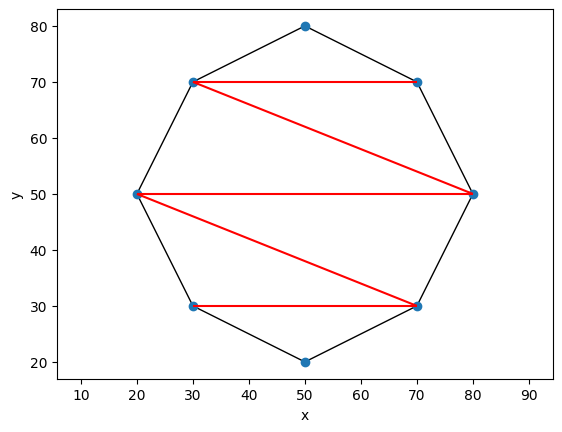

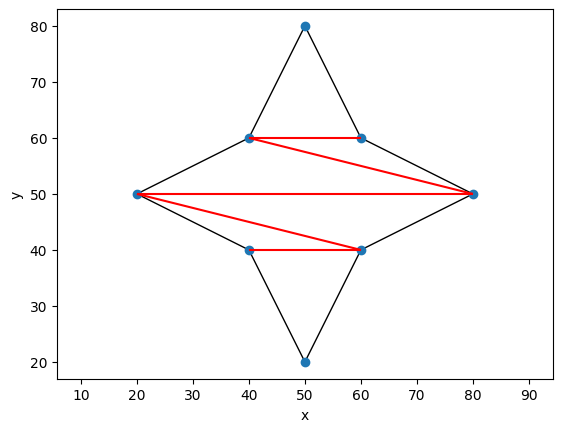

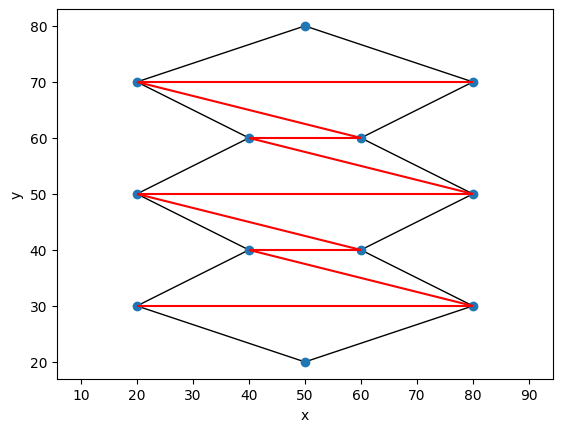

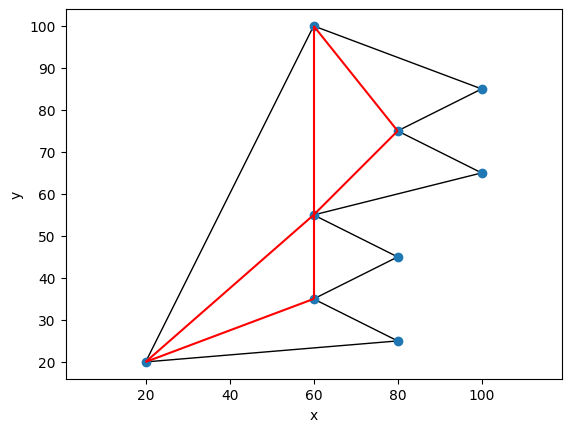

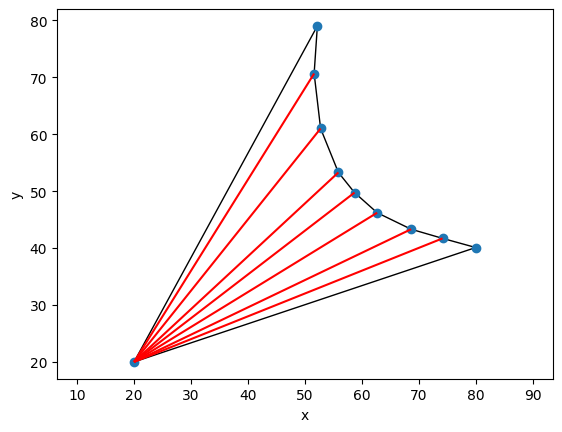

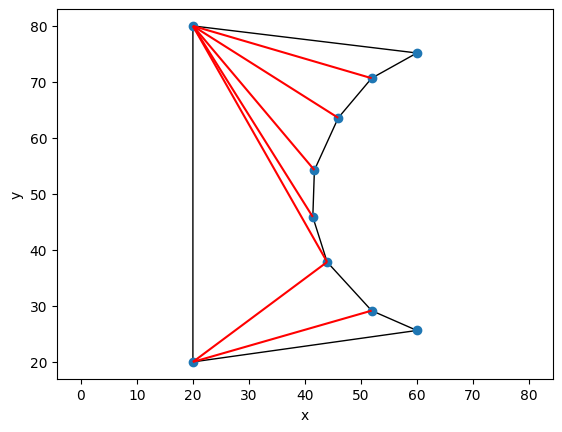

In [26]:
for polygon_file_name in polygon_file_names:
    polygon = read_polygon(polygon_file_name)
    tri = triangulation(polygon)
    draw_polygon_tri(polygon, [(polygon[x], polygon[y]) for (x, y) in tri])
    print(f"{polygon_file_name}")
    print(f"liczba dodanych przekątnych: {len(tri)}")

In [27]:
def triangulation_draw(polygon, epsilon=1e-24):
    n = len(polygon)
    
    vis = Visualizer()
    vis.add_line_segment([(polygon[i], polygon[(i + 1) % n]) for i in range(n)], color = "black")

    left_chain, right_chain = split_polygon_into_chains(polygon)
    merged = merge_chains(left_chain, right_chain, polygon)

    diagonals = []
    stack = [merged[0], merged[1]]

    vis.add_point(polygon[stack[0][0]], color = "red")
    vis.add_point(polygon[stack[1][0]], color = "red")

    for i in range(2, len(merged)):
        vis.add_point(polygon[merged[i][0]], color="red")
        if merged[i][1] == stack[-1][1]:
            while len(stack) > 1:
                mat_det_value = mat_det(polygon[stack[-1][0]], polygon[stack[-2][0]], polygon[merged[i][0]])
                difference = abs(merged[i][0] - stack[-2][0]) 
                if (difference != 1 and difference != n-1 and
                    ((merged[i][1] == "left" and mat_det_value < -epsilon) or (merged[i][1] == "right" and mat_det_value > epsilon))):
                    diagonals.append((merged[i][0], stack[-2][0]))
                    vis.add_line_segment([polygon[merged[i][0]], polygon[stack[-2][0]]], color="red")
                    vis.add_point(polygon[stack[-1][0]], color ="grey")
                    stack.pop()
                else:
                    break
            stack.append(merged[i])
        else:
            for j in range(len(stack)):
                difference = abs(merged[i][0] - stack[j][0])
                if difference != 1 and difference != n - 1:
                    diagonals.append((merged[i][0], stack[j][0]))
                    vis.add_line_segment([polygon[merged[i][0]], polygon[stack[j][0]]], color="red")
                vis.add_point(polygon[stack[j][0]], color ="grey")
            stack = [stack[-1], merged[i]]

    
    return diagonals, vis

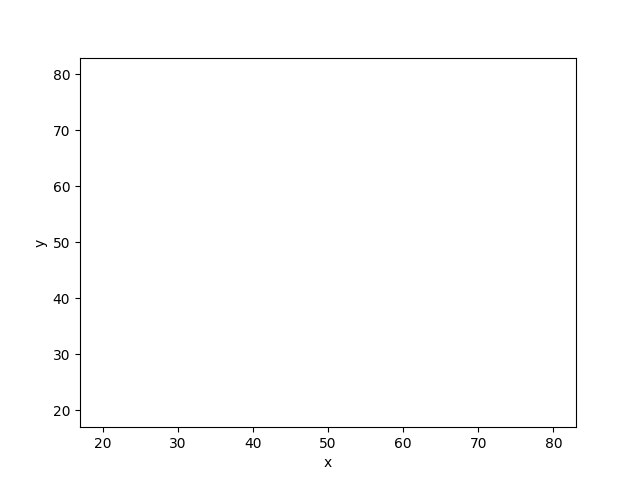

In [28]:
polygon_a = read_polygon("A")
tri, vis = triangulation_draw(polygon_a)
vis.show_gif()

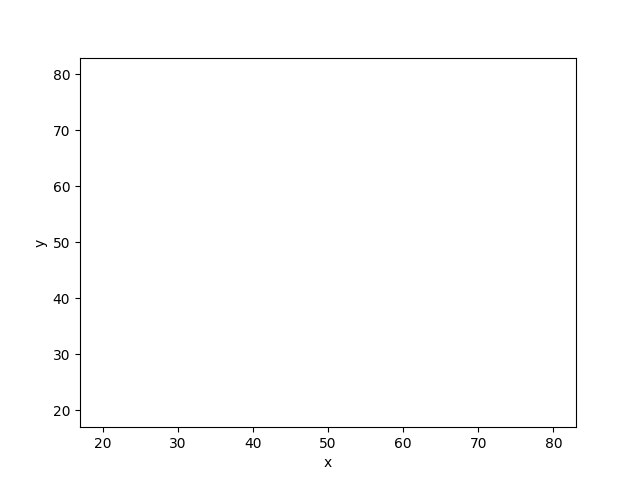

In [29]:
polygon_b = read_polygon("B")
tri, vis = triangulation_draw(polygon_b)
vis.show_gif()

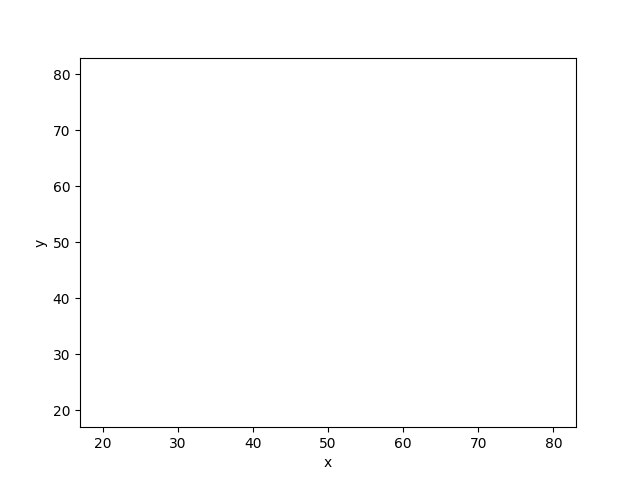

In [30]:
polygon_c = read_polygon("C")
tri, vis = triangulation_draw(polygon_c)
vis.show_gif()

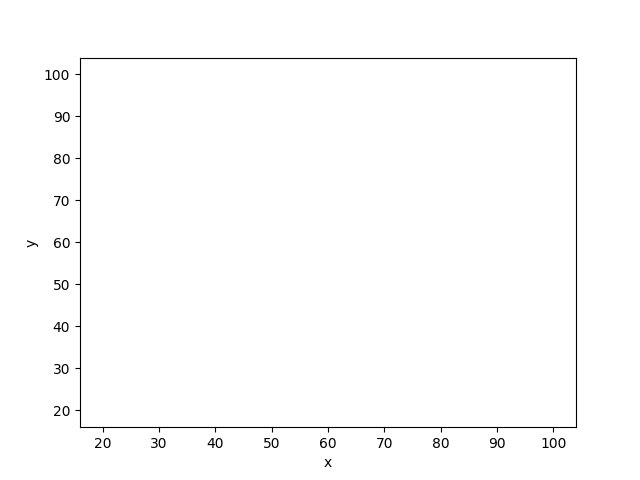

In [31]:
polygon_d = read_polygon("D")
tri, vis = triangulation_draw(polygon_d)
vis.show_gif()

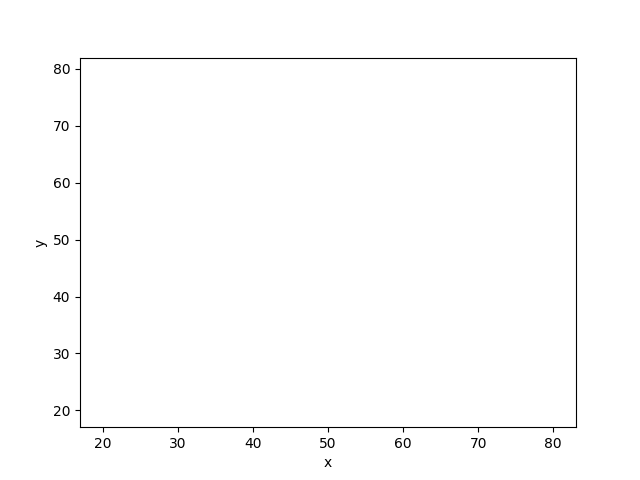

In [32]:
polygon_e = read_polygon("E")
tri, vis = triangulation_draw(polygon_e)
vis.show_gif()

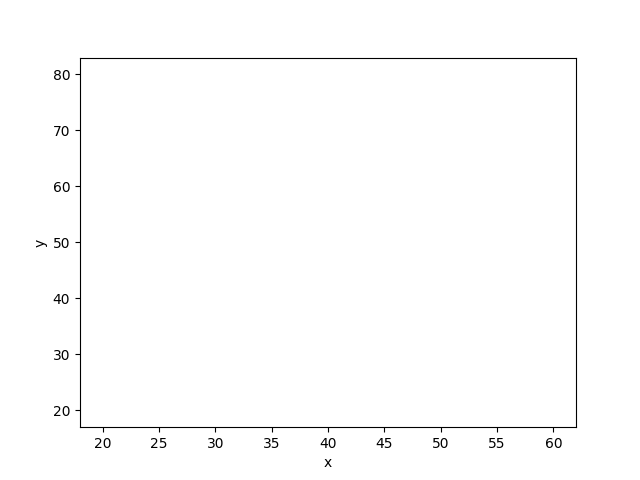

In [33]:
polygon_f = read_polygon("F")
tri, vis = triangulation_draw(polygon_f)
vis.show_gif()